In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_cab = pd.read_csv('Cab_Data.csv')
df_city = pd.read_csv('City.csv')
df_customer = pd.read_csv('Customer_ID.csv')
df_transaction = pd.read_csv('Transaction_ID.csv')

In [19]:
df_cab.info()
df_cab.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000

In [21]:
df_city.info()
df_city.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1

In [22]:
df_customer.info()
df_customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

In [23]:
df_transaction.info()
df_transaction.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000

We could first link customer information with transaction information to understand each company's main customer groups. 

In [24]:
df_all = df_transaction.merge(df_customer, left_on = 'Customer ID', right_on = 'Customer ID')

In [26]:
df_all = df_all.merge(df_cab, left_on = 'Transaction ID', right_on = 'Transaction ID')

In [28]:
df_all['profit'] = df_all['Price Charged'] - df_all['Cost of Trip']

In [30]:
df_all

Transaction ID  Customer ID Payment_Mode  Gender  Age  \
0             10000011        29290         Card    Male   28   
1             10351127        29290         Cash    Male   28   
2             10412921        29290         Card    Male   28   
3             10000012        27703         Card    Male   27   
4             10320494        27703         Card    Male   27   
...                ...          ...          ...     ...  ...   
359387        10439790        38520         Card  Female   42   
359388        10439799        12490         Cash    Male   33   
359389        10439838        41414         Card    Male   38   
359390        10439840        41677         Cash    Male   23   
359391        10439846        39761         Card  Female   32   

        Income (USD/Month)  Date of Travel     Company            City  \
0                    10813           42377    Pink Cab      ATLANTA GA   
1                    10813           43302  Yellow Cab      ATLANTA GA   
2                    10813           43427  Yellow Cab      ATLANTA GA   
3                     9237           42375    Pink Cab      ATLANTA GA   
4                     9237           43211  Yellow Cab      ATLANTA GA   
...                    ...             ...         ...             ...   
359387               19417           43107  Yellow Cab      SEATTLE WA   
359388               18713           43103  Yellow Cab  SILICON VALLEY   
359389                3960           43104  Yellow Cab       TUCSON AZ   
359390               19454           43106  Yellow Cab       TUCSON AZ   
359391               10128           43104  Yellow Cab       TUCSON AZ   

        KM Travelled  Price Charged  Cost of Trip    profit  
0              30.45         370.95      313.6350   57.3150  
1              26.19         598.70      317.4228  281.2772  
2              42.55         792.05      597.4020  194.6480  
3              28.62         358.52      334.8540   23.6660  
4              36.38         721.10      467.1192  253.9808  
...              ...            ...           ...       ...  
359387         16.66         261.18      213.9144   47.2656  
359388         13.72         277.97      172.8720  105.0980  
359389         19.00         303.77      232.5600   71.2100  
359390          5.60          92.42       70.5600   21.8600  
359391         13.30         244.65      180.3480   64.3020  

[359392 rows x 13 columns]

#### Hypothesis 1: customers riding with each company differ in their genders

The hypothesis can be tested with a Chi-square test as is shown below

In [37]:
from scipy.stats import chi2_contingency

In [38]:
df_chi = df_all.groupby('Company').Gender.value_counts()

In [40]:
stat, p, dof, expected = chi2_contingency(df_chi)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


Here we cannot reject H0, so we cannot make the assumptions that gender will influence customers' decision when choosing the company to ride with. 

#### Hypothesis 2: Two companies will attract customers in differen income group. 

<AxesSubplot:xlabel='Company', ylabel='Income (USD/Month)'>

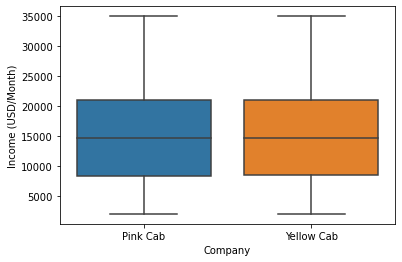

In [41]:
sns.boxplot(data = df_all, x = 'Company', y = 'Income (USD/Month)')

C:\Users\Odele\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Density'>

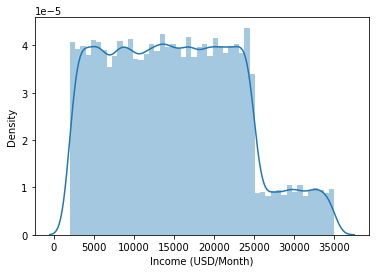

In [50]:
sns.distplot(df_all[df_all['Company'] == 'Pink Cab']['Income (USD/Month)'])

C:\Users\Odele\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Density'>

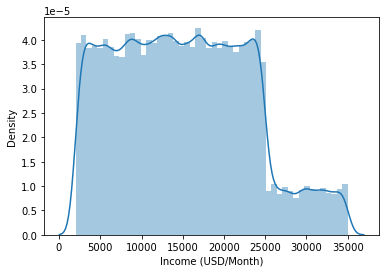

In [51]:
sns.distplot(df_all[df_all['Company'] == 'Yellow Cab']['Income (USD/Month)'])

We could also a t-test to examine if income is significantly different within two companies. But basically from the plots, we could tell income group may not be differnet for two companies

#### Hypothesis 3: Customers in different companies ride differnet distance, which will be reflected in price charged. The assumption here is that two companies charge customers in a similar way. 

<AxesSubplot:xlabel='Company', ylabel='Price Charged'>

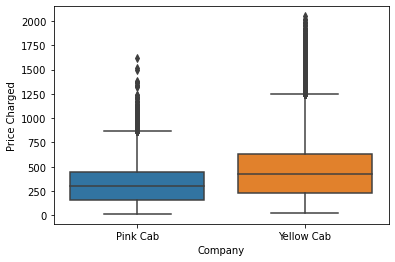

In [52]:
sns.boxplot(data = df_all, x = 'Company', y = 'Price Charged')

C:\Users\Odele\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price Charged', ylabel='Density'>

C:\Users\Odele\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price Charged', ylabel='Density'>

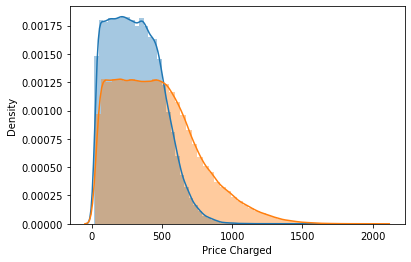

In [53]:
sns.distplot(df_all[df_all['Company'] == 'Pink Cab']['Price Charged'])
sns.distplot(df_all[df_all['Company'] == 'Yellow Cab']['Price Charged'])

A t-test is worth conducting to see if the differnece is significant. But note that we have to make sure before doing that they are charging customers in a similar way (Or we adjust the charged price to make sure it refelct different distance customers ride)

In [54]:
import scipy.stats as stats

In [58]:
data_group_1 = df_all[df_all['Company'] == 'Pink Cab']['Price Charged']
data_group_2 = df_all[df_all['Company'] == 'Yellow Cab']['Price Charged']
stats.ttest_ind(a=data_group_1, b=data_group_2, equal_var=True, alternative = 'less')

Ttest_indResult(statistic=-140.3722440435425, pvalue=0.0)

The p-value is less than 0.5. Therefore we reject H0 and prove that customers riding with Yellow Cab are paying more(possibly riding a longer distance)

#### Hypothesis 4: Two companies have different exposure in areas.

In [78]:
df_citybreak = df_all.groupby(['Company','City']).size().to_frame('size').reset_index() ## reset_index() turns a groupby back into a dataframe so we could do more manipulation

In [79]:
df_citybreak

Company            City   size
0     Pink Cab      ATLANTA GA   1762
1     Pink Cab       AUSTIN TX   1868
2     Pink Cab       BOSTON MA   5186
3     Pink Cab      CHICAGO IL   9361
4     Pink Cab       DALLAS TX   1380
5     Pink Cab       DENVER CO   1394
6     Pink Cab  LOS ANGELES CA  19865
7     Pink Cab        MIAMI FL   2002
8     Pink Cab    NASHVILLE TN   1841
9     Pink Cab     NEW YORK NY  13967
10    Pink Cab   ORANGE COUNTY   1513
11    Pink Cab      PHOENIX AZ    864
12    Pink Cab   PITTSBURGH PA    682
13    Pink Cab   SACRAMENTO CA   1334
14    Pink Cab    SAN DIEGO CA  10672
15    Pink Cab      SEATTLE WA   2732
16    Pink Cab  SILICON VALLEY   3797
17    Pink Cab       TUCSON AZ    799
18    Pink Cab   WASHINGTON DC   3692
19  Yellow Cab      ATLANTA GA   5795
20  Yellow Cab       AUSTIN TX   3028
21  Yellow Cab       BOSTON MA  24506
22  Yellow Cab      CHICAGO IL  47264
23  Yellow Cab       DALLAS TX   5637
24  Yellow Cab       DENVER CO   2431
25  Yellow Cab  LOS ANGELES CA  28168
26  Yellow Cab        MIAMI FL   4452
27  Yellow Cab    NASHVILLE TN   1169
28  Yellow Cab     NEW YORK NY  85918
29  Yellow Cab   ORANGE COUNTY   2469
30  Yellow Cab      PHOENIX AZ   1200
31  Yellow Cab   PITTSBURGH PA    631
32  Yellow Cab   SACRAMENTO CA   1033
33  Yellow Cab    SAN DIEGO CA   9816
34  Yellow Cab      SEATTLE WA   5265
35  Yellow Cab  SILICON VALLEY   4722
36  Yellow Cab       TUCSON AZ   1132
37  Yellow Cab   WASHINGTON DC  40045

In [80]:
df_exposure = pd.pivot_table(df_citybreak, values = 'size' , index = 'City', columns = 'Company')

In [82]:
df_exposure.loc['Total',:]= df_exposure.sum(axis=0)

In [84]:
df_exposure['Ratio'] = df_exposure['Pink Cab']/df_exposure['Yellow Cab']

In [88]:
df_exposure.sort_values(by = 'Ratio',ascending = False)

Company         Pink Cab  Yellow Cab     Ratio
City                                          
NASHVILLE TN      1841.0      1169.0  1.574850
SACRAMENTO CA     1334.0      1033.0  1.291384
SAN DIEGO CA     10672.0      9816.0  1.087205
PITTSBURGH PA      682.0       631.0  1.080824
SILICON VALLEY    3797.0      4722.0  0.804108
PHOENIX AZ         864.0      1200.0  0.720000
TUCSON AZ          799.0      1132.0  0.705830
LOS ANGELES CA   19865.0     28168.0  0.705233
AUSTIN TX         1868.0      3028.0  0.616909
ORANGE COUNTY     1513.0      2469.0  0.612799
DENVER CO         1394.0      2431.0  0.573427
SEATTLE WA        2732.0      5265.0  0.518898
MIAMI FL          2002.0      4452.0  0.449686
Total            84711.0    274681.0  0.308398
ATLANTA GA        1762.0      5795.0  0.304055
DALLAS TX         1380.0      5637.0  0.244811
BOSTON MA         5186.0     24506.0  0.211622
CHICAGO IL        9361.0     47264.0  0.198058
NEW YORK NY      13967.0     85918.0  0.162562
WASHINGTON DC     3692.0     40045.0  0.092196

Cities above Total row are cities where Pink cab has better exposure than Yellow Cab given their primary difference in total transactions. Therefore, Pink Cab has quite large potential in San Diego while Yellow Can has better exposure in New York. 

#### Hypothesis 5: Two companies differ in profits made

<AxesSubplot:xlabel='Company', ylabel='profit'>

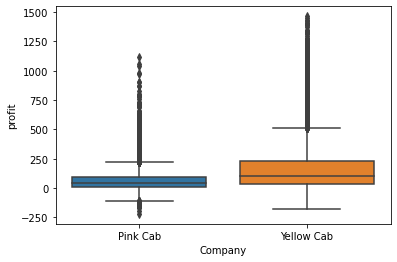

In [90]:
sns.boxplot(data = df_all, x = 'Company', y = 'profit')

In [91]:
data_group_1 = df_all[df_all['Company'] == 'Pink Cab']['profit']
data_group_2 = df_all[df_all['Company'] == 'Yellow Cab']['profit']
stats.ttest_ind(a=data_group_1, b=data_group_2, equal_var=True, alternative = 'less')

Ttest_indResult(statistic=-160.37151759478056, pvalue=0.0)

The plots and test show us that Yellow Cab is making more profit than Pink Cab